In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('nalin_batch_data.csv')

In [111]:
filtered_df = df[df['pos'] == '(32, 8)']
selected = ['RunId','iteration','Step','height','width','schedule_type','radius','seed','Cooperating_Agents','total_pay_off','Static_Agents']
filtered_df = filtered_df[selected]
filtered_df.to_csv('filtered_table.csv', index=False)

In [130]:
def result_by_radius(file, activation, outcome):
    # list results of all iterations by radius
    df = pd.read_csv(file)
    #last_step_df = df[df['Step'] == 30]
    act_df = df[df['schedule_type'] == activation]
    print(act_df['radius'].unique())
    pivot_df = act_df.pivot(index='iteration', columns='radius', values=outcome)
    print(pivot_df)
    pivot_df.to_csv(f'{outcome}_by_radius_{activation}.csv')

    # plot average results by radius
    avg_agents = act_df.groupby('radius')[outcome].mean() / 2500
    
    radius_values = act_df['radius'].unique()
    plt.bar(radius_values, avg_agents[radius_values])
    plt.xticks(radius_values)
    plt.xlabel('Radius')

    outcome_name = re.sub(r'[^a-zA-Z]', ' ', outcome).capitalize()
    plt.ylabel(f'Average Ratio of {outcome_name}')
    plt.title(f'Last Step in {activation} Activation')
    plt.show()

[ 1  2  3  4  5 10 15 20 25]
radius       1     2   3   4   5     10    15    20    25
iteration                                                
0          2460     0   0   0   0     0  2500     0     0
1          2500     0   0   0   0     0     0  2500     0
2          2457     0   0   0   0     0  2500  2500  2500
3          2469     0   0   0   0     0     0  2500  2500
4          2444     0   0   0   0     0     0  2500     0
5          2468     0   0   0   0     0  2500     0  2500
6          2456     0   0   0   0     0     0     0     0
7          2472     0   0   0   0     0     0     0  2500
8          2460     0   0   0   0     0     0  2500  2500
9          2480     0   0   0   0     0     0     0  2500
10         2448     0   0   0   0     0     0  2500  2500
11         2467     0   0   0   0     0  2500  2500  2500
12         2484     0   0   0   0     0  2500     0  2500
13         2459     0   0   0   0     0     0     0  2500
14         2459     0   0   0   0     0    

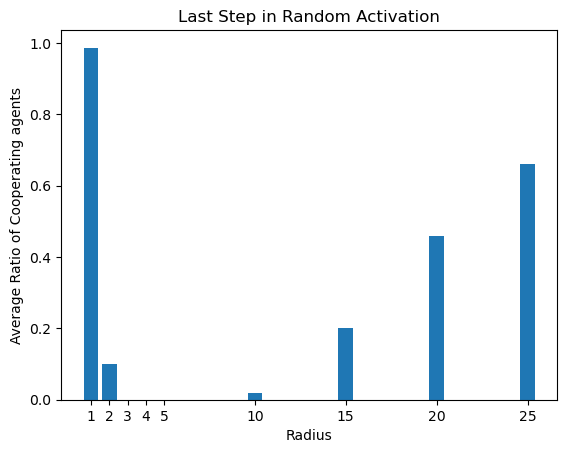

In [131]:
result_by_radius('filtered_table.csv', 'Random', 'Cooperating_Agents')

[ 1  2  3  4  5 10 15 20 25]
radius       1     2     3     4     5     10    15    20    25
iteration                                                      
0          2493  2499  2284  2466  2411  2493  1173  2498  1283
1          2496  2499  2414  2427  2426  1242  1252  1238  1217
2          2491  2497  2291  2386  2385  2474  1255  1284  1198
3          2488  2494  2366  2408  2455  2489  2486  1237  1259
4          2484  2499  2264  2442  2447  2486  2485  2499  1309
5          2489  2480  2293  2373  2477  2471  1296  1257  1245
6          2482  2499  2297  2425  2441  2485  2497  1251  1256
7          2486  2499  2287  2447  2455  2499  2499  1266  1248
8          2488  2499  2329  2340  2445  2495  1212  1273  1222
9          2498  2270  2358  2343  2439  2490  2488  2499  1238
10         2486  2493  2359  2416  2381  2485  2488  1256  1275
11         2488  2498  2330  2457  2464  2496  1250  1264  1257
12         2497  2498  2366  2442  2449  1259  1238  1238  1210
13         

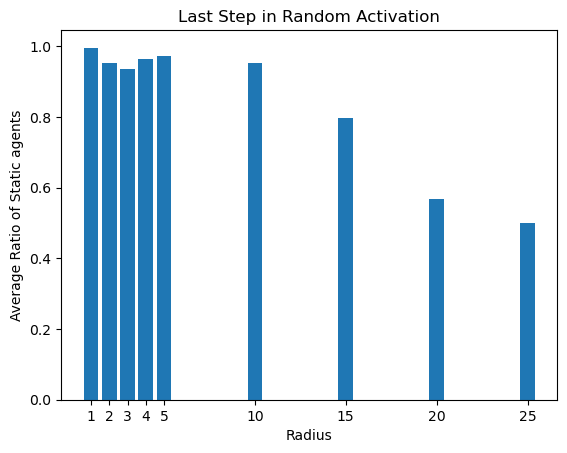

In [134]:
result_by_radius('filtered_table.csv', 'Random', 'Static_Agents')

[ 1  2  3  4  5 10 15 20 25]
radius       1     2     3     4     5     10    15    20    25
iteration                                                      
0          2399  1260  2497  1283  1247  1263  1299  1237  1235
1          2334  2494  2496  1239  1249  1252  1246  1221  1231
2          2423  2499  1256  1239  1224  1277  1240  1288  1265
3          2429  2497  1263  1239  1222  1232  1274  1261  1249
4          2366  2457  1255  1277  1287  1223  1246  1235  1294
5          2408  2493  2496  1223  1253  1246  1250  1268  1207
6          2456  2492  1253  1215  1242  1234  1250  1238  1259
7          2493  2498  1180  1258  1274  1227  1229  1262  1237
8          2499  2497  1242  1201  1263  1217  1272  1225  1235
9          2443  2493  1200  1225  1231  1254  1251  1233  1302
10         2496  2498  1285  1253  1278  1262  1266  1240  1280
11         2353  2494  1236  1277  1264  1253  1259  1245  1250
12         2497  2498  1250  1286  1228  1291  1203  1246  1247
13         

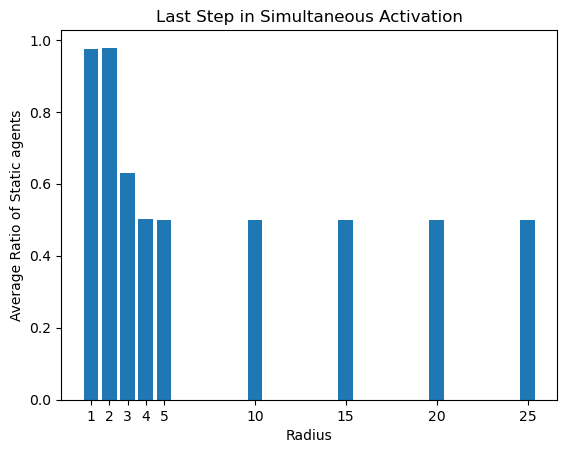

In [135]:
result_by_radius('filtered_table.csv', 'Simultaneous', 'Static_Agents')

[ 1  2  3  4  5 10 15 20 25]
radius       1     2     3   4   5   10  15  20  25
iteration                                          
0          2218     0     0   0   0   0   0   0   0
1          1773     0  2500   0   0   0   0   0   0
2          2176     0     0   0   0   0   0   0   0
3          2290     0     0   0   0   0   0   0   0
4          1967  2420     0   0   0   0   0   0   0
5          2176     0     0   0   0   0   0   0   0
6          2281  2500     0   0   0   0   0   0   0
7             0     0     0   0   0   0   0   0   0
8             0     0     0   0   0   0   0   0   0
9          2192     0     0   0   0   0   0   0   0
10            0     0     0   0   0   0   0   0   0
11         1997     0     0   0   0   0   0   0   0
12            0     0     0   0   0   0   0   0   0
13            0     0     0   0   0   0   0   0   0
14            0     0     0   0   0   0   0   0   0
15         2159     0     0   0   0   0   0   0   0
16           42  2500     0   0   0

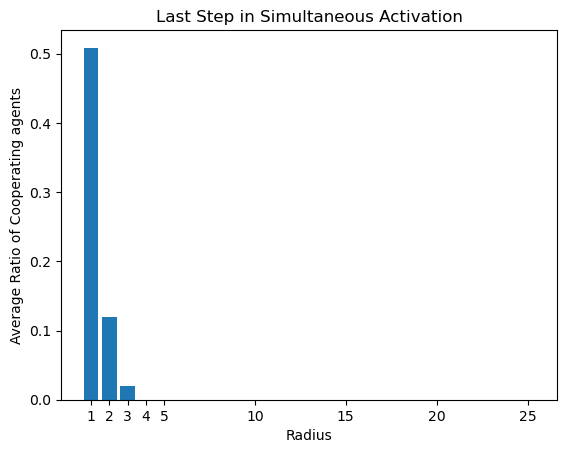

In [133]:
result_by_radius('filtered_table.csv', 'Simultaneous', 'Cooperating_Agents')

[ 1.  7. 13. 19. 25.]
radius     1.0   7.0   13.0  19.0  25.0
iteration                              
0          2500  2500  2500  2500  2500
1          2500  2500     0  2500  2500
2          2500  2500     0  2500  2500
3          2500  2500  2500  2500  2500
4          2500  2500  2500  2500     0
5          2500  2500  2500     0     0
6          2500  2500  2500     0  2500
7          2500  2500  2500     0  2500
8          2500  2500  2500     0     0
9          2500  2500  2500  2500  2500
10         2500  2500  2500  2500  2500
11         2500  2500  2500     0  2500
12         2500  2500  2500     0     0
13         2500  2500  2500  2500     0
14         2500  2500  2500  2500  2500
15         2500  2500  2500  2500     0
16         2500  2500  2500  2500     0
17         2500  2500  2500  2500     0
18         2500  2500  2500  2500  2500
19         2500  2500  2500     0  2500
20         2500  2500  2500  2500     0
21         2500  2500  2500  2500     0
22         2500  2

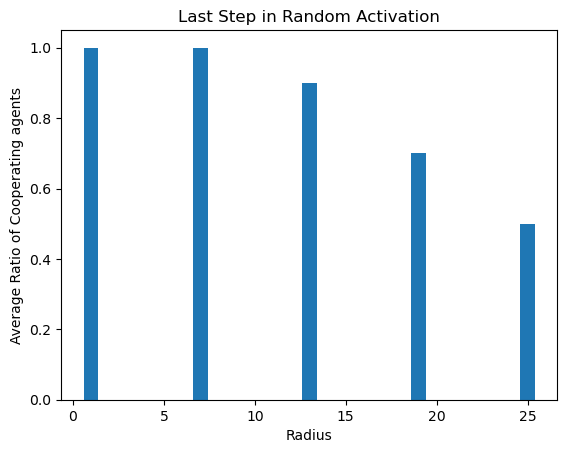

In [119]:
result_by_radius('batch_data_random.csv', 'Random', 'Cooperating_Agents')

radius     1.0   7.0   13.0  19.0  25.0
iteration                              
0          2500  2500  2500  2500  2500
1          2500  2500  2500  2500  2500
2          2500  2500  2500  2500  2500
3          2500  2500  2500  2500  2500
4          2500  2500  2500  2500  2500
5          2500  2500  2500  2500  2500
6          2500  2500  2500  2500  2500
7          2500  2500  2500  2500  2500
8          2500  2500  2500  2500  2500
9          2500  2500  2500  2500  2500
10         2500  2500  2500  2500  2500
11         2500  2500  2500  2500  2500
12         2500  2500  2500  2500  2500
13         2500  2500  2500  2500  2500
14         2500  2500  2500  2500  2500
15         2500  2500  2500  2500  2500
16         2500  2500  2500  2500  2500
17         2500  2500  2500  2500  2500
18         2500  2500  2500  2500  2500
19         2500  2500  2500  2500  2500
20         2500  2500  2500  2500  2500
21         2500  2500  2500  2500  2500
22         2500  2500  2500  2500  2500


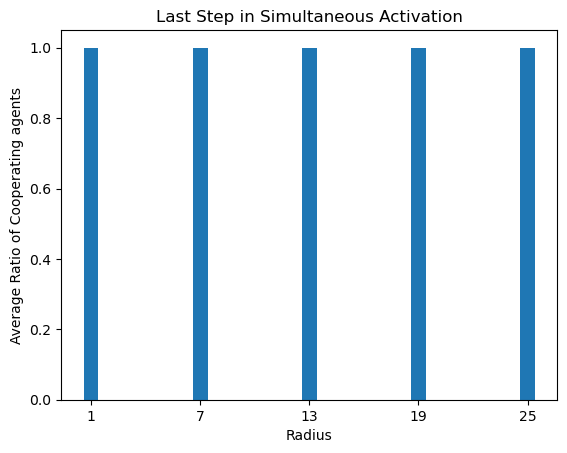

In [82]:
result_by_radius('batch_data_simultaneous.csv', 'Simultaneous', 'Cooperating_Agents')